In [95]:
#! python3
# A program that produces trajectories of three bodies
# according to Netwon's laws of gravitation

# import third-party libraries
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
#plt.style.use('dark_background')


In [96]:
import random

def ran():
    return random.random() * 20 - 10

def ran_mass():
    return 10 + random.random()

# masses of planets
m_1 = ran_mass()
m_2 = ran_mass()
m_3 = ran_mass()

# starting coordinates for planets
# p1_start = x_1, y_1, z_1
p1_start = np.array([-10, 10 + ran(), -11])
v1_start = np.array([-3, 0, 0])

# p2_start = x_2, y_2, z_2
p2_start = np.array([0, 0, 0])
v2_start = np.array([0, 0, 0])

# p3_start = x_3, y_3, z_3
p3_start = np.array([10, 10, 12])
v3_start = np.array([3, 0, 0])

In [97]:
def accelerations(p1, p2, p3, m_1, m_2, m_3):
    """
    A function to calculate the derivatives of x, y, and z
    given 3 object and their locations according to Newton's laws
    """

    #m_1, m_2, m_3 = self.m1, self.m2, self.m3
    planet_1_dv = -9.8 * m_2 * (p1 - p2)/(np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 + (p1[2] - p2[2])**2)**3) - \
            9.8 * m_3 * (p1 - p3)/(np.sqrt((p1[0] - p3[0])**2 + (p1[1] - p3[1])**2 + (p1[2] - p3[2])**2)**3)

    planet_2_dv = -9.8 * m_3 * (p2 - p3)/(np.sqrt((p2[0] - p3[0])**2 + (p2[1] - p3[1])**2 + (p2[2] - p3[2])**2)**3) - \
            9.8 * m_1 * (p2 - p1)/(np.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2 + (p2[2] - p1[2])**2)**3)

    planet_3_dv = -9.8 * m_1 * (p3 - p1)/(np.sqrt((p3[0] - p1[0])**2 + (p3[1] - p1[1])**2 + (p3[2] - p1[2])**2)**3) - \
            9.8 * m_2 * (p3 - p2)/(np.sqrt((p3[0] - p2[0])**2 + (p3[1] - p2[1])**2 + (p3[2] - p2[2])**2)**3)

    return planet_1_dv, planet_2_dv, planet_3_dv

In [98]:
# parameters
delta_t = 0.001
steps = 200000

# initialize trajectory array
p1 = np.array([[0.,0.,0.] for i in range(steps)])
v1 = np.array([[0.,0.,0.] for i in range(steps)])

p2 = np.array([[0.,0.,0.] for j in range(steps)])
v2 = np.array([[0.,0.,0.] for j in range(steps)])

p3 = np.array([[0.,0.,0.] for k in range(steps)])
v3 = np.array([[0.,0.,0.] for k in range(steps)])

In [99]:
# starting point and velocity
p1[0], p2[0], p3[0] = p1_start, p2_start, p3_start

v1[0], v2[0], v3[0] = v1_start, v2_start, v3_start

In [100]:
# evolution of the system

accels = []

for i in range(steps-1):
    # calculate derivatives
    dv1, dv2, dv3 = accelerations(p1[i], p2[i], p3[i], m_1, m_2, m_3)
    accels.append(np.mean(dv1))

    v1[i + 1] = v1[i] + dv1 * delta_t
    v2[i + 1] = v2[i] + dv2 * delta_t
    v3[i + 1] = v3[i] + dv3 * delta_t

    p1[i + 1] = p1[i] + v1[i] * delta_t
    p2[i + 1] = p2[i] + v2[i] * delta_t
    p3[i + 1] = p3[i] + v3[i] * delta_t

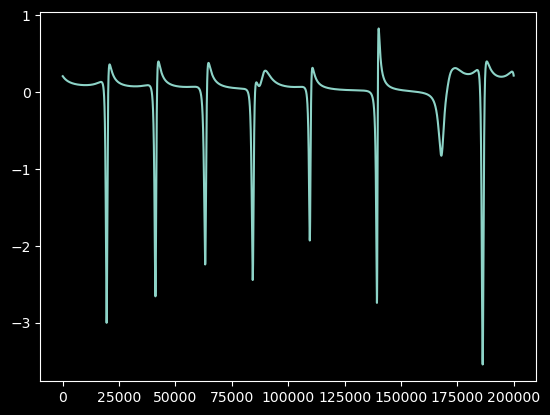

In [101]:
plt.plot(accels)
plt.show()

In [102]:
def random_color_1ch(num_steps):
    '''Geenrate colors for 1 channel.'''
    cur = 0
    result = []
    for _ in range(num_steps):
        cur += 1 if random.randint(0, 1) == 1 else -1
        result.append(cur)
    lowest = min(result)
    highest = max(result)
    for i in range(len(result)):
        result[i] = (result[i] - lowest) / (highest - lowest)
    return result

c1 = random_color_1ch(len(p1) - 1)
c2 = random_color_1ch(len(p1) - 1)
c3 = random_color_1ch(len(p1) - 1)

C = list(zip(c1, c2, c3))

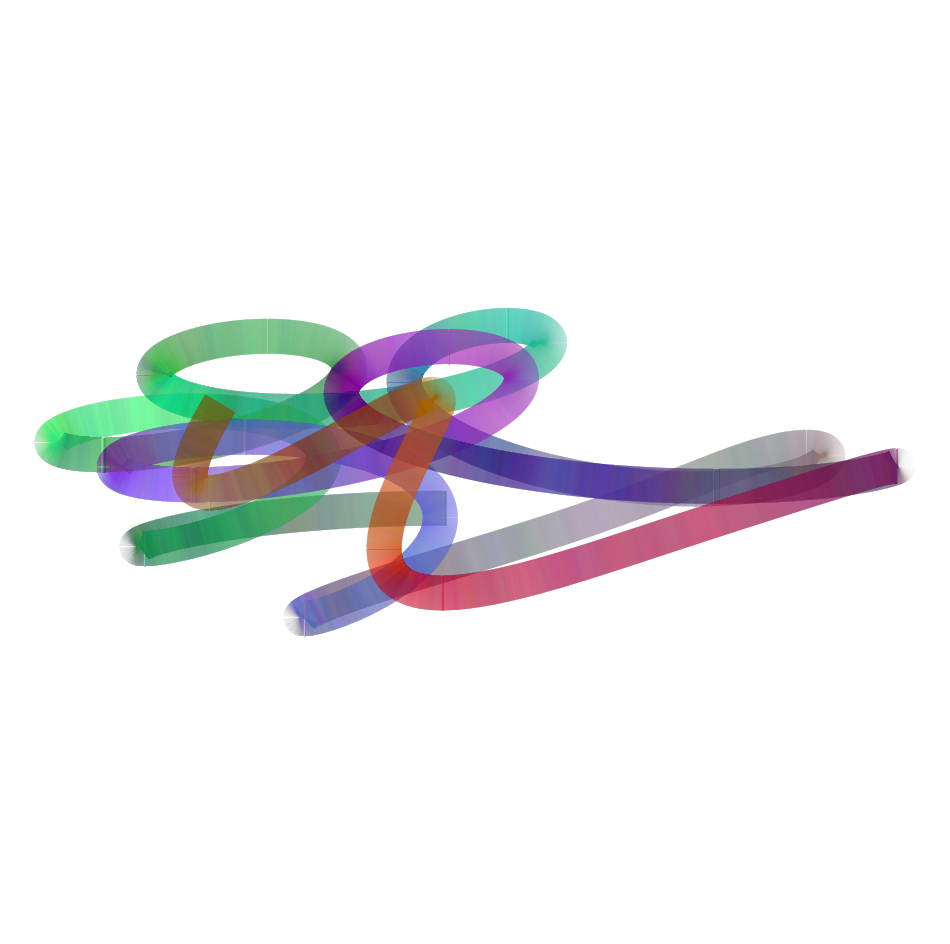

In [103]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np


x = []
for p in p1:
    x.append(p[0])
    
y = []
for p in p1:
    y.append(p[1])
    
x = np.array(x)
y = np.array(y)

# Create a list of line segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create a LineCollection object with multicolored line segments
# (C is a list of colors that looks like [(0.1, 0.2, 0.3), (0.2, 0.3, 0.4)...]
lc = LineCollection(segments, colors=C, linewidths=25, alpha=1.0)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 12))

# Set the background color of the plot
fig.set_facecolor('white')

# Add the LineCollection to the axis
ax.add_collection(lc)

# Set the axis limits
x_range = x.max() - x.min()
y_range = y.max() - y.min()
R = 0.05
ax.set_xlim(x.min() - x_range * R, x.max() + x_range * R)
ax.set_ylim(y.min() - y_range * R, y.max() + y_range * R)

ax.set_aspect('equal', 'datalim')
ax = plt.gca()

plt.axis('off')

# Show the plot
plt.show()